# Lending Club Case Study


---

# Introduction
This case-study is an academic analysis of a fictious Finance house / Lending House known as `Lending Club` which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

# Summary of Data
The data provided contains the information about past loan applicants and whether they `defaulted` or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Important Aspects of the Dataset
- Data set contains all loans processed by the Lending house
- When a person applies for a loan, there are two types of decisions that could be taken by the company:
  - **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:
    - **Fully Paid**: Applicant fully paid his loan
    - **Current**: Existing Loan and customer is paying the instalments.
    - **Charged-off**: Customer have defaulted to the loan
  - **Load Rejected**: Customer's loan have been rejected

# Requirements Overview
- Analyze the data and determine major factors to considered before issuing a loan
- Understand the driving factor behind default loan
- Cleanse data so that use-cases can be mapped correctly

# Assumptions
This section will contain all assumptions considered while processing the data.
1. Data file contains sensitive data
2. Focus of this excersise is to analyze the common patterns for all customer's, it does not focus on specific customer
3. Data can not be deleted in isolation without undertanding the business implications

# Approach
Analysis of the data will be divided into following three parts:
## Data cleansing
In this section, data will be loaded and cleansed based on the use-case(s)
## Univariate Data Analysis
In this section, analysis of one variable will be done and implication on the loan trends will be analyzed
## Multi-Variate Data Analysis
Multiple variables will be analyzed and impact on loan default will be determined.

# Checklist
- [ ] Data loading and cleansing
- [ ] Univariate Analysis
  - [ ] Check trends of differetn variables  
- [ ] Bivariate Analysis
- [ ] Update `README.MD`
- [ ] Upload the notebook on github
  - [ ] Add `.csv` file in the same folder
  - [ ] Test
- [ ] Submit the project on the learning portal

# References
- [Github Repo](https://github.com/furqanbaqai/upgrad.lendingclub.git)





# Preliminary Steps

In [2]:
# Loading the required libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
%matplotlib inline
warnings.filterwarnings('ignore')

In [104]:
# Loading files
df = pd.read_csv(r'loan.csv')
df.shape

(10607, 111)

In [4]:
# Viewing the list of all data types by converting the `dtypes` to `dictionary`
# This will bypass the limit of max 25 columns 
df.dtypes.to_dict()

{'acc_now_delinq': dtype('int64'),
 'acc_open_past_24mths': dtype('float64'),
 'addr_state': dtype('O'),
 'all_util': dtype('float64'),
 'annual_inc': dtype('float64'),
 'annual_inc_joint': dtype('float64'),
 'application_type': dtype('O'),
 'avg_cur_bal': dtype('float64'),
 'bc_open_to_buy': dtype('float64'),
 'bc_util': dtype('float64'),
 'chargeoff_within_12_mths': dtype('float64'),
 'collection_recovery_fee': dtype('float64'),
 'collections_12_mths_ex_med': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'delinq_amnt': dtype('int64'),
 'desc': dtype('O'),
 'dti': dtype('float64'),
 'dti_joint': dtype('float64'),
 'earliest_cr_line': dtype('O'),
 'emp_length': dtype('O'),
 'emp_title': dtype('O'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'grade': dtype('O'),
 'home_ownership': dtype('O'),
 'id': dtype('int64'),
 'il_util': dtype('float64'),
 'initial_list_status': dtype('O'),
 'inq_fi': dtype('float64'),
 'inq_last_12m': dtype('float64'),
 'inq_last_

# Data Cleansing
In this step we will cleans data and ensure that it is according to the expected syntax / semantics

Quoting from wikipedia:
>> Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.[1] Data cleansing may be performed interactively with data wrangling tools, or as batch processing through scripting.[2]
ref: [wiki](https://en.wikipedia.org/wiki/Data_cleansing)

## Removing fulfilled loans information
Fulfilled loan information will be removed from the data set since it will not provide any trends.

In [5]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Here; `Fully Paid` can be removed from the data set

In [6]:
dfFilt = df[~(df.loan_status == 'Fully Paid')]
dfFilt.shape

(6767, 111)

## Fixing values of `emp_length` field
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [7]:
dfFilt.emp_length.value_counts()
dfFilt.emp_length_year = dfFilt.emp_length.str.replace('years','')
dfFilt.emp_length_year = dfFilt.emp_length_year.str.replace('year','')
dfFilt.emp_length_year = dfFilt.emp_length_year.str.replace('+','')
dfFilt.emp_length_year = dfFilt.emp_length_year.str.replace('< 1','0')
dfFilt.emp_length_year = dfFilt.emp_length_year.str.strip()

In [8]:
# Checking if there are nulls after applying the filter
dfFilt.emp_length_year.isnull().sum()

270

We can see here that there are 270 rows which are null. Let's replace all this value with 0 so that we can process them correctly

In [9]:
dfFilt.emp_length_year.fillna(0, inplace=True)
dfFilt.emp_length_year = dfFilt.emp_length_year.astype("int32")
dfFilt.emp_length_year.dtype
dfFilt.emp_length_year.value_counts()
dfFilt.emp_length = dfFilt.emp_length_year

## Fixing data type for variable `int_rate`

In [10]:
dfFilt.int_rate = dfFilt.int_rate.str.replace('%','').astype('float')

In [11]:
dfFilt.int_rate.describe()

count    6767.000000
mean       14.024448
std         3.673173
min         5.420000
25%        11.490000
50%        13.790000
75%        16.770000
max        24.590000
Name: int_rate, dtype: float64

# Uni-variate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. ref: [univariate analysis](https://www.statisticshowto.com/univariate/#:~:text=Univariate%20analysis%20is%20the%20simplest,finds%20patterns%20in%20the%20data.)

## Good vs Bad loans
This analysis will determine good vs bad loans.

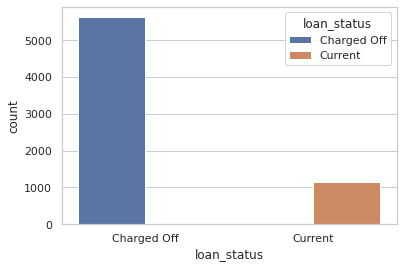

In [12]:
sns.set_theme(style="whitegrid")
sns.countplot(data=dfFilt, x='loan_status', hue='loan_status', order=dfFilt.loan_status.value_counts().index)
plt.show()

### Observations
- Number of charged offloans is more then number of current, underprocess loans

## Long term vs Medium Term loans Trend
This will determine trend of long term vs short term

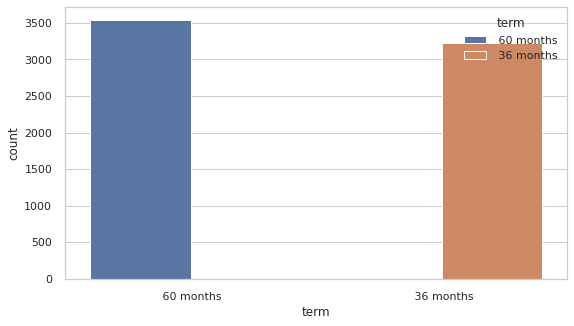

In [94]:
plt.figure(figsize=[9,5])
sns.set_theme(style="whitegrid")
sns.countplot(data=dfFilt, x='term', hue='term', order=dfFilt.term.value_counts().index)
plt.show()

### Observations
- Not much diffrence between long-term vs short term loans 

## Employement status of the loans
This trend will check the employement status of the loan

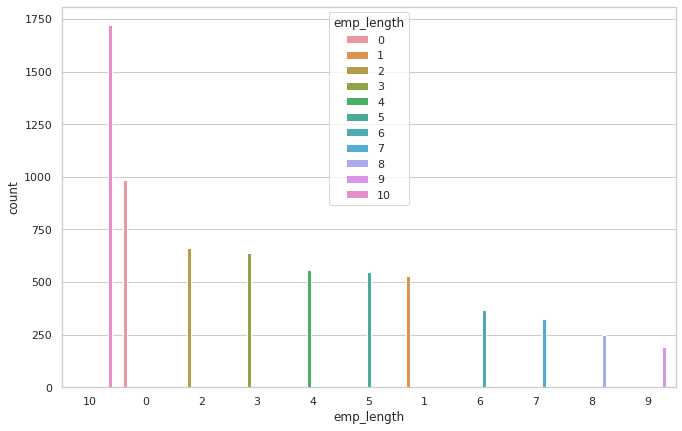

In [14]:
plt.figure(figsize=[11,7])
sns.set_theme(style="whitegrid")
sns.countplot(data=dfFilt, x='emp_length', hue='emp_length', order=dfFilt.emp_length.value_counts().index)
plt.show()

### Observations
- People having more the 10 years of experience have more loans

## Year wise loan disbursement
We will analyze loan disbursement, year wise to understand the trend

In [15]:
# Converting date format MON-YY to standard format so that essential components can be extracted
# NOTE: Since day of the month is not present in the data set, date will be set as 1st of the month
dfFilt.issue_d = dfFilt.issue_d.apply(lambda x: dt.datetime.strptime(x,'%b-%y') if type(x)==str else pd.NaT)

In [16]:
dfFilt.issue_d_year = dfFilt.issue_d.dt.year

In [91]:
dfFilt.issue_d_year.value_counts()

2011    4396
2010    1485
2009     594
2008     247
2007      45
Name: issue_d, dtype: int64

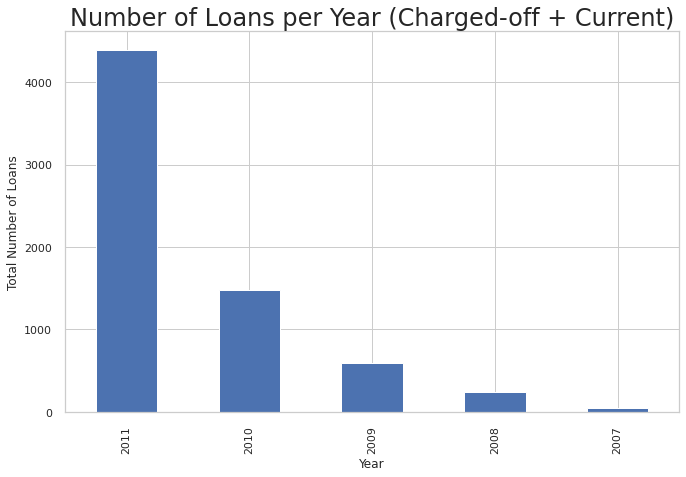

In [97]:
plt.figure(figsize=[11,7])
ax = dfFilt.issue_d_year.value_counts().plot.bar()
ax.set_xlabel("Year")
ax.set_ylabel("Total Number of Loans")
ax.set_title('Number of Loans per Year (Charged-off + Current)', size=24)
plt.show()

### Observation
- In `2011` maximum number of loans where issued

## Analyzing data distribution of annual income

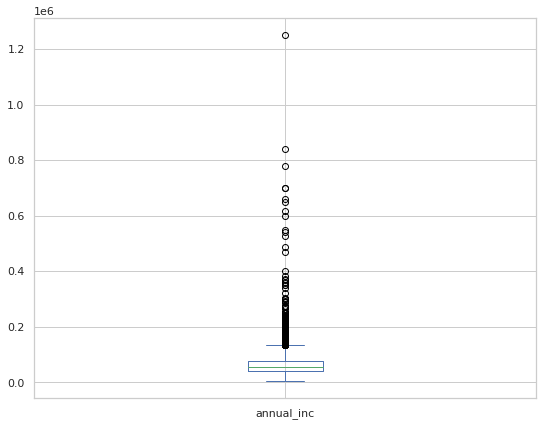

In [20]:
plt.figure(figsize=[9,7])
dfFilt.annual_inc.plot.box()
plt.show()

## Analyzing Distribution of Loan Amount

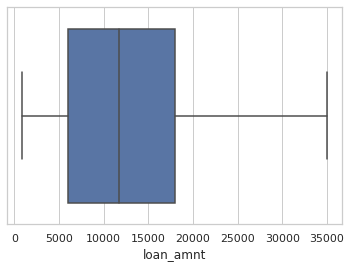

In [22]:
sns.boxplot(dfFilt.loan_amnt)
plt.show()

### Observation
- Averge loan amount lies between 10K to 15K
- 75% of loans are amounted above 12K to 18K (approx)

## Analyzing Distribution according to the purpose of payments




In [98]:
_dfPurpose =  pd.DataFrame((df.purpose.value_counts()*100)/len(df))

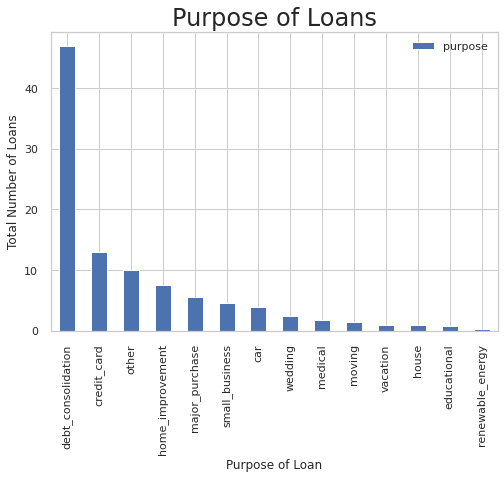

In [103]:
ax = _dfPurpose.plot.bar()
ax.set_xlabel("Purpose of Loan")
ax.set_ylabel("Total Number of Loans")
ax.set_title('Purpose of Loans', size=24)
plt.show()

### Observations
- More then 45% of customers are taking loan for `debt consolidation`

### For all types of loans (including fiulfilled)

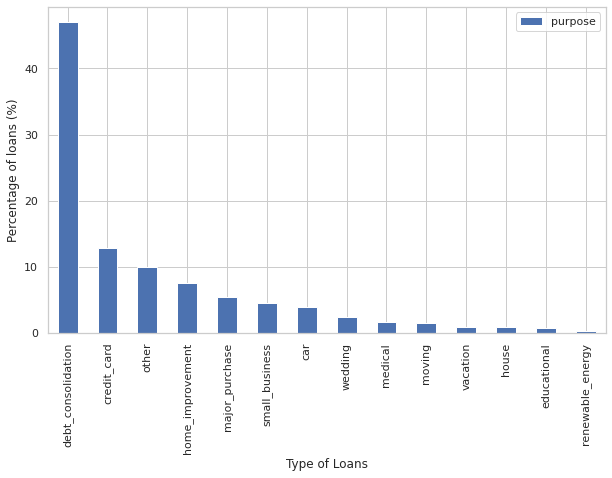

In [24]:
ax = _dfPurpose.plot(kind='bar' , stacked="True", figsize=[10,6])
ax.set_xlabel("Type of Loans")
ax.set_ylabel("Percentage of loans (%)")
plt.show()

### For only `charged off` and `current` loans

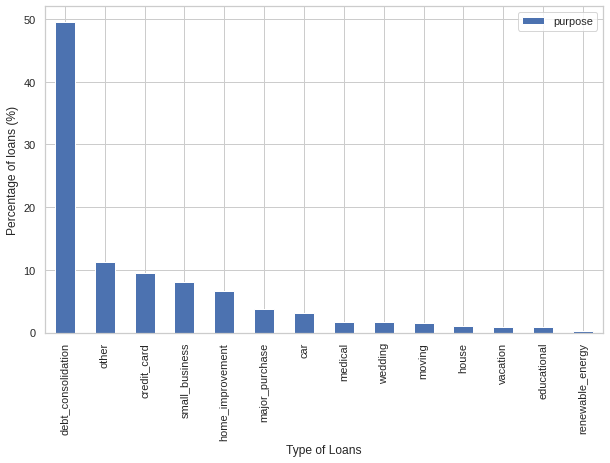

In [25]:
_dfPurpose =  pd.DataFrame((dfFilt.purpose.value_counts()*100)/len(dfFilt))
ax = _dfPurpose.plot(kind='bar' , stacked="True", figsize=[10,6])
ax.set_xlabel("Type of Loans")
ax.set_ylabel("Percentage of loans (%)")
matplotlib.style.use('seaborn')
plt.show()

# Multi-variate Analysis
Multiple variables will be analyzed and impact on loan default will be determined.

## Filtering data set
For multivariate analysis, filtering data set and fetching important variables which are relevant for the use-case.


In [26]:
dfFilt.emp_length_year.dtype

dtype('int32')

In [27]:
# Creating a new data set `_dfLoan` having essential parameters
_dfLoan = dfFilt.reindex(columns=['loan_amnt','funded_amnt','int_rate', 'funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt'])
_dfLoan = _dfLoan[['loan_amnt','funded_amnt','int_rate', 'funded_amnt_inv','installment','emp_length','annual_inc','dti','total_pymnt']].apply(pd.to_numeric)

In [ ]:
# Bining interest rate categories
dfFilt['int_rate_cats'] = pd.cut(dfFilt['int_rate'], [0, 10, 12.5, 15, 20], labels=['0-10', '10-13', '12.5-15', '15+'])

In [34]:
dfFilt['int_rate_cats'].value_counts()

15+        2226
12.5-15    1734
10-13      1502
0-10        907
Name: int_rate_cats, dtype: int64

In [84]:
# Binning Annual Income to Categories
dfFilt['annual_inc_bins'] = pd.cut(dfFilt['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])
dfFilt.annual_inc_bins.value_counts()

40000-60000    2074
20000-40000    1684
80000+         1498
60000-80000    1264
0-20000         246
Name: annual_inc_bins, dtype: int64

## Heatmap

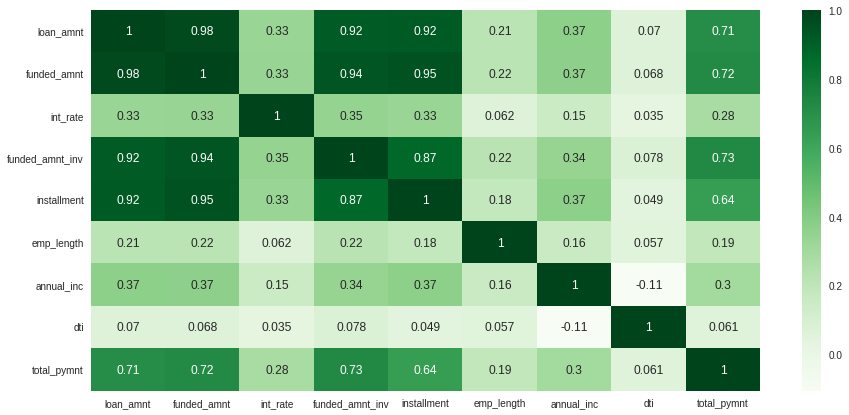

In [28]:
_dfCorrel = _dfLoan.corr()
plt.figure(figsize=[15,7])
sns.heatmap(_dfCorrel, cmap="Greens", annot=True )
plt.show()

### Observations
- There is a Positive correlation between annual income and employment years
- Loan amount, investor amount, funding amount are strongly correlated.
- Annual income with DTI(Debt-to-income ratio) is negatively correalted.


## Pairplots to analyze the data

In [30]:
sns.pairplot(_dfLoan)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Intrest Rate vs Charged Off

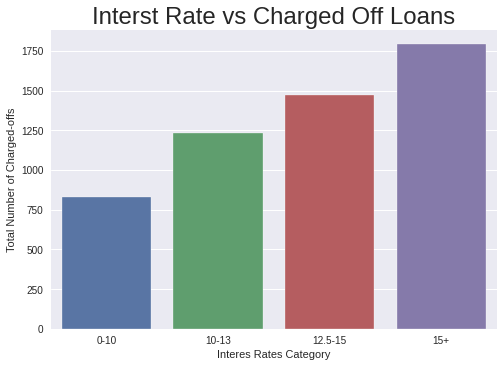

In [57]:
_dfIntRateVsChrgOff = dfFilt.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().reset_index()
ax = sns.barplot(data=_dfIntRateVsChrgOff,x = 'int_rate_cats', y='Charged Off')
ax.set_xlabel("Interes Rates Category")
ax.set_ylabel("Total Number of Charged-offs")
ax.set_title('Interst Rate vs Charged Off Loans', size=24)
plt.show()

### Observation
- There is a direct relation of charged-off loan with higher interest rates
- Loans with higher interst rates are more riskier

## Home Ownership vs Loan Status
This parameter will determine the home ownership status vs `Loan Status`. We will use this parameter to determine what type of home owners are getting defaulted on loans

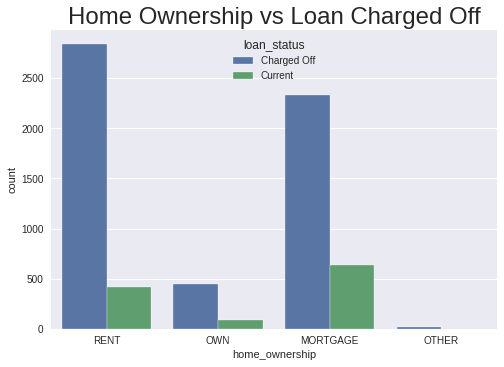

In [65]:
# dfFilt.home_ownership.value_counts()
ax = sns.countplot(x="home_ownership",data=dfFilt,hue='loan_status')
ax.set_title('Home Ownership Type vs Loan Charged Off', size=24)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Loan Application Count')   
plt.show()

### Observation
- Number of applicants having rented house is high
- Charged-off loans having rented house is high as well

## Purpose of Payments and Charged Off
This parameter will be used for determining the purpose of payments and it's charged-off status

In [68]:
# Grouping data for find load_status and purpose relationship
_dfPurpVsLoan = dfFilt.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
_dfPurpVsLoan = _dfPurpVsLoan.fillna(0)
_dfPurpVsLoan

loan_status,purpose,Charged Off,Current
0,car,160.0,50.0
1,credit_card,542.0,103.0
2,debt_consolidation,2767.0,586.0
3,educational,56.0,0.0
4,home_improvement,347.0,101.0
5,house,59.0,14.0
6,major_purchase,222.0,37.0
7,medical,106.0,12.0
8,moving,92.0,7.0
9,other,633.0,128.0


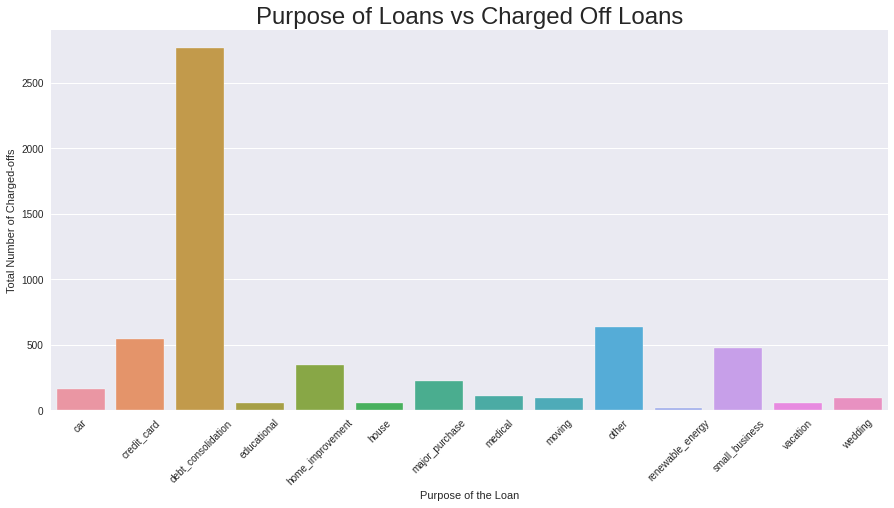

In [73]:
plt.figure(figsize=[15,7])
ax = sns.barplot(data=_dfPurpVsLoan, x = 'purpose', y='Charged Off')
plt.xticks(rotation=45)
ax.set_xlabel("Purpose of the Loan")
ax.set_ylabel("Total Number of Charged-offs")
ax.set_title('Purpose of Loans vs Charged Off Loans', size=24)
plt.show()

### Observations
- More numbre of people are doing debt consolidation, that is why the charged off is high as well
- Credit card, other and Small business have high charged-off's number as well

## Determining Relationship of Employement Lenght
Bivariate Analysis on employment length against Chargedoff_Proportion


In [77]:
_dfEmpVsLoan = dfFilt.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().reset_index()
_dfEmpVsLoan = _dfEmpVsLoan.fillna(0)
_dfEmpVsLoan

loan_status,emp_length,Charged Off,Current
0,0,867,117
1,1,456,71
2,2,567,97
3,3,555,83
4,4,462,94
5,5,458,88
6,6,307,61
7,7,263,62
8,8,203,44
9,9,158,32


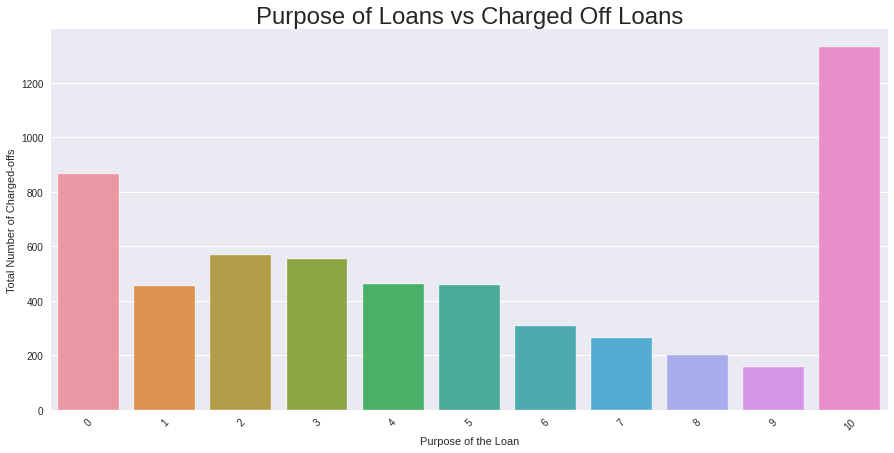

In [78]:
plt.figure(figsize=[15,7])
ax = sns.barplot(data=_dfEmpVsLoan, x = 'emp_length', y='Charged Off')
plt.xticks(rotation=45)
ax.set_xlabel("Employement Length (in years)")
ax.set_ylabel("Total Number of Charged-offs")
ax.set_title('Purpose of Loans vs Charged Off Loans', size=24)
plt.show()

### Observations
- People with 10+ years of experience have more charged off as they have more number of loans
- People having no experience have high number of charged-off

## Relationship of Annual Income
Determines the relationship of annual income and charged of loans. 

In [87]:
_dfAnnIncVsLoan = dfFilt.groupby(['annual_inc_bins', 'loan_status']).loan_status.count().unstack().reset_index()
_dfAnnIncVsLoan

loan_status,annual_inc_bins,Charged Off,Current
0,0-20000,237,9
1,20000-40000,1514,170
2,40000-60000,1729,345
3,60000-80000,1024,240
4,80000+,1122,376


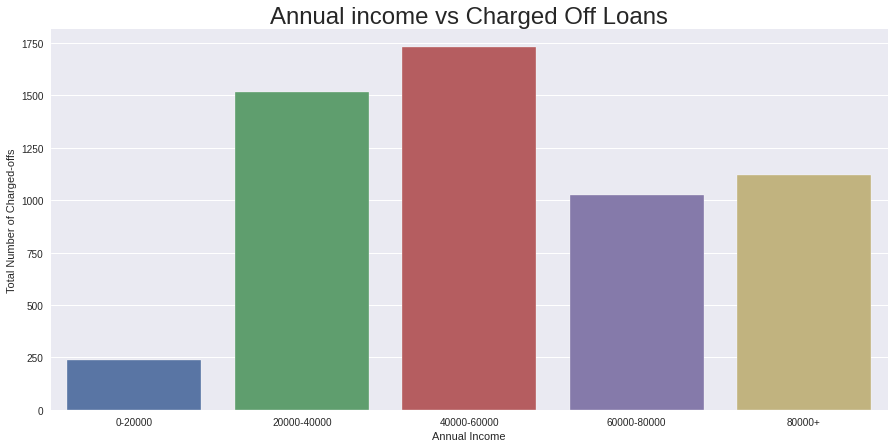

In [89]:
plt.figure(figsize=[15,7])
ax = sns.barplot(data=_dfAnnIncVsLoan, x = 'annual_inc_bins', y='Charged Off')

ax.set_xlabel("Annual Income")
ax.set_ylabel("Total Number of Charged-offs")
ax.set_title('Annual income vs Charged Off Loans', size=24)
plt.show()

### Observation
- People having annual income between 20K to 60K have more number of charged-offs